Decision Tree Structure:

|--- Color <= 2.50
|   |--- Shape <= 1.50
|   |   |--- Color <= 0.50
|   |   |   |--- class: 2
|   |   |--- Color >  0.50
|   |   |   |--- class: 2
|   |--- Shape >  1.50
|   |   |--- Color <= 1.50
|   |   |   |--- class: 3
|   |   |--- Color >  1.50
|   |   |   |--- class: 0
|--- Color >  2.50
|   |--- class: 1



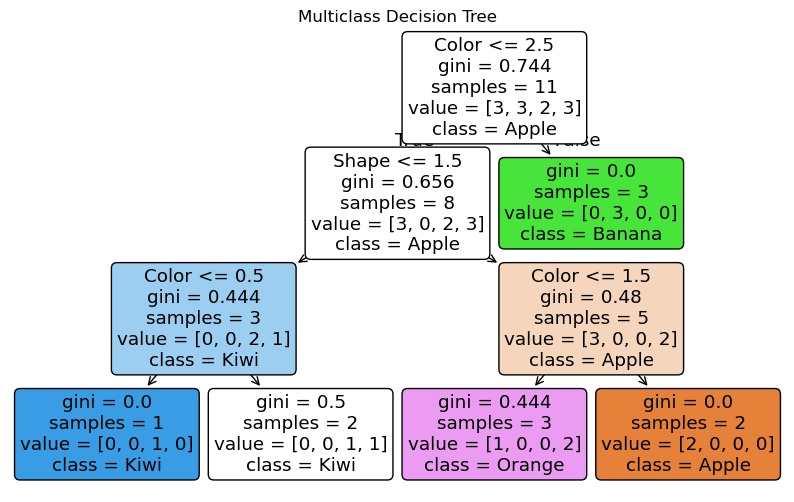


Predictions for new samples:
['Banana' 'Orange']


In [3]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Step 2: Create Sample Dataset
data = {
    'Color': ['Red', 'Green', 'Yellow', 'Yellow', 'Orange', 'Orange', 'Green', 'Red', 'Yellow', 'Orange', 'Red'],
    'Shape': ['Round', 'Round', 'Long', 'Round', 'Round', 'Oval', 'Oval', 'Round', 'Long', 'Round', 'Oval'],
    'Fruit': ['Apple', 'Apple', 'Banana', 'Banana', 'Orange', 'Orange', 'Kiwi', 'Apple', 'Banana', 'Orange', 'Kiwi']
}

df = pd.DataFrame(data)

# Step 3: Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

le_color = LabelEncoder()
le_shape = LabelEncoder()
le_fruit = LabelEncoder()

df['Color_encoded'] = le_color.fit_transform(df['Color'])
df['Shape_encoded'] = le_shape.fit_transform(df['Shape'])
df['Fruit_encoded'] = le_fruit.fit_transform(df['Fruit'])

# Step 4: Prepare Features and Target
X = df[['Color_encoded', 'Shape_encoded']]
y = df['Fruit_encoded']

# Step 5: Train Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X, y)

# Step 6: Visualize Tree (Text)
print("Decision Tree Structure:\n")
print(export_text(model, feature_names=['Color', 'Shape']))

# Step 7: Optional - Visual Tree Plot
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=['Color', 'Shape'], class_names=le_fruit.classes_, filled=True, rounded=True)
plt.title("Multiclass Decision Tree")
plt.show()

# Step 8: Predict New Example
new_data = pd.DataFrame({
    'Color': ['Yellow', 'Green'],
    'Shape': ['Oval', 'Round']
})
new_data['Color_encoded'] = le_color.transform(new_data['Color'])
new_data['Shape_encoded'] = le_shape.transform(new_data['Shape'])

predictions = model.predict(new_data[['Color_encoded', 'Shape_encoded']])
predicted_labels = le_fruit.inverse_transform(predictions)

print("\nPredictions for new samples:")
print(predicted_labels)